ENG 301 - COMPUTER VISION - ASSIGNMENT 1 

Team GTT4 

- Tran Ngoc Anh 
- Nguyen Thu Huyen 
- Phan Nguyen Tuong Minh

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# import os
%matplotlib inline
import math
import datetime
import numpy as np

# Part 1: Theory


In [49]:
#The object as seen by the camera
T_cam_obj = np.array([[0, 1, 0, 1], [1, 0, 0, 10], [0, 0, -1, 9], [0, 0, 0, 1]]) 
#The camera as seen by the object
T_obj_cam = np.linalg.inv(T_cam_obj)
#The origin of the robot base coordinate system as seen by the camera
T_cam_robot = np.array([[1, 0, 0, -10], [0, -1, 0, 20], [0, 0, -1, 10], [0, 0, 0, 1]])
#The robot’s base coordinate system with respect to the object
T_obj_robot = T_obj_cam @ T_cam_robot

##a)
**rot(z, 90°)** = \\
[[cos90° -sin90° 0 0] \\
[sin90° cos90° 0 0] \\
[0 0 1 0] \\
[0 0 0 1]] \\
**rot(z, 90°)** = \\
[[0 -1 0 0] \\
[1 0 0 0] \\
[0 0 1 0] \\
[0 0 0 1]] \\






In [50]:
rot_1 = np.array([[0, -1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
T_cam_robot_new = rot_1@T_cam_robot
print("The position of the camera with respect to the robot's base coordinate system is")
print(np.linalg.inv(T_cam_robot_new))

The position of the camera with respect to the robot's base coordinate system is
[[ 0.  1.  0. 10.]
 [ 1.  0.  0. 20.]
 [-0. -0. -1. 10.]
 [ 0.  0.  0.  1.]]


##b)
**rot(x, 90°)** = \\
[[1 0 0 0] \\
[0 cos90° -sin90° 0] \\
[0 sin90° cos90° 0] \\
[0 0 0 1]] \\
**rot(x, 90°)** = \\
[[1 0 0 0] \\
[0 0 -1 0] \\
[0 1 0 0] \\
[0 0 0 1]] \\


In [51]:
#The rotation matrix (the object is rotated by 90 degree about the x axis of the object and translated by 4 units along the rotated y axis)
rot_2 = np.array([[1, 0, 0, 0], [0, 0, -1, 0], [0, 1, 0, 0], [0, 0, 0, 1]]) @ np.array([[1, 0, 0, 0], [0, 1, 0, 4], [0, 0, 1, 0], [0, 0, 0, 1]])
rot_2

array([[ 1,  0,  0,  0],
       [ 0,  0, -1,  0],
       [ 0,  1,  0,  4],
       [ 0,  0,  0,  1]])

In [52]:
T_obj_robot_new = rot_2 @ T_obj_robot

In [53]:
print("The position of the object with respect to the robot’s base coordinate system")
print(np.linalg.inv(T_obj_robot_new))

The position of the object with respect to the robot’s base coordinate system
[[ 0.  0.  1.  7.]
 [-1. -0. -0. 10.]
 [-0. -1. -0.  1.]
 [ 0.  0.  0.  1.]]


In [54]:
#The original position of the object as seen by the rotated position of the camera 
T_cam_obj_new = rot_1 @ T_cam_obj
T_cam_obj_new

array([[ -1,   0,   0, -10],
       [  0,   1,   0,   1],
       [  0,   0,  -1,   9],
       [  0,   0,   0,   1]])

In [55]:
print("The position of the object with respect to the rotated camera coordinate system")
print(rot_2@np.linalg.inv(T_cam_obj_new))

The position of the object with respect to the rotated camera coordinate system
[[ -1.   0.   0. -10.]
 [  0.   0.   1.  -9.]
 [  0.   1.   0.   3.]
 [  0.   0.   0.   1.]]


#Programming

## Part 2: Camera Caliberation

In [ ]:
#import packages
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import glob
import yaml
from datetime import datetime

In [ ]:
# images = glob.glob('/content/drive/MyDrive/CV_Assignment1_GTT4/chess-all/cam2_images/*.jpg')
images = glob.glob('chess_paper/*.jpg')

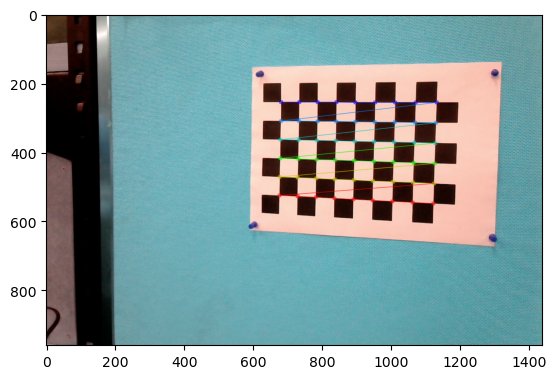

In [ ]:
CHESSBOARD_CORNER_NUM_X = 9
CHESSBOARD_CORNER_NUM_Y = 6
CAMERA_PARAMETERS_OUTPUT_FILE = "cam_result_{}.yaml".format(datetime.now().strftime("%H::%M::%S"))

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
objp = np.zeros((CHESSBOARD_CORNER_NUM_X*CHESSBOARD_CORNER_NUM_Y,3), np.float32)
objp[:,:2] = np.mgrid[0:CHESSBOARD_CORNER_NUM_X,0:CHESSBOARD_CORNER_NUM_Y].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cornered_img = cv.drawChessboardCorners(img, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), corners2, ret)
        plt.imshow(cornered_img);
    else:
        print('Failed to find a chessboard in {}'.format(fname))

In [ ]:
#Detect caliberation 

print ("Calibrating camera .... Please wait...")
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera matrix is \n", mtx, "\n And is stored in calibration.yaml file along with distortion coefficients : \n", dist)
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )
data = {'camera_matrix': np.asarray(mtx).tolist(), 'dist_coeff': np.asarray(dist).tolist()}
with open(CAMERA_PARAMETERS_OUTPUT_FILE, "w") as f:
    yaml.dump(data, f)

Calibrating camera .... Please wait...
Camera matrix is 
 [[1.61361240e+03 0.00000000e+00 7.32529126e+02]
 [0.00000000e+00 1.60565525e+03 4.65415515e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 
 And is stored in calibration.yaml file along with distortion coefficients : 
 [[ 4.82755440e-03  1.64114314e+00  3.99664571e-03  3.62401730e-04
  -9.31462246e+00]]
total error: 0.09386921581205139


In [ ]:
vals = cv.calibrationMatrixValues(mtx, (img.shape[1], img.shape[0]), 3.58, 2.02)
print("Focal length in mm:", vals[2])

Focal length in mm: 4.011619719034508


## Undistort chessboard

In [ ]:

def undistort(img, mtx, dst): 
    h,  w = img.shape[:2]
    #get new camera matrix from calibrated camera matrix 
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
    # undistort
    dst = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    #display result 
    plt.figure(figsize = (12, 10))
    plt.subplot(121); plt.axis('off'); plt.imshow(img[:, :, ::-1]);  plt.title('Original Image')
    plt.subplot(122); plt.axis('off'); plt.imshow(dst[:, :, ::-1]);  plt.title('Undistorted Image');

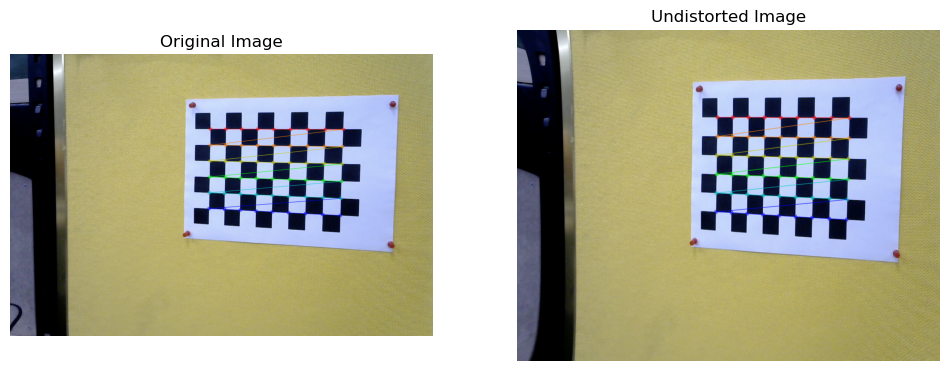

In [ ]:
undistort(cornered_img, mtx, dst)

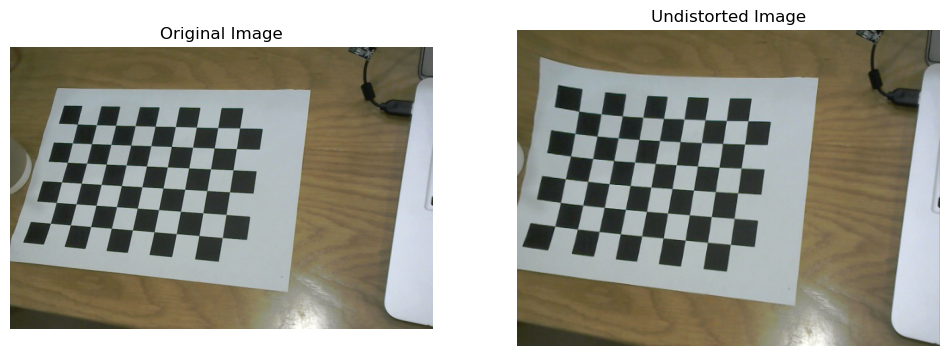

In [ ]:
#Try other images
img1 = cv.imread("chess_paper/image30.jpg")
undistort(img1, mtx, dst)

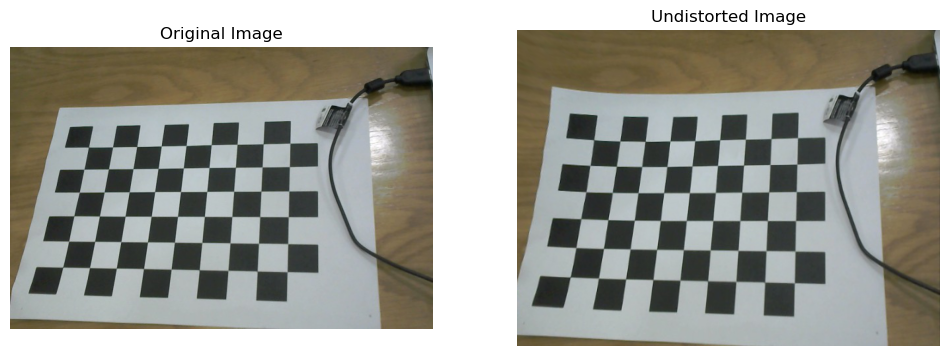

In [ ]:
#Try another image
img2 = cv.imread("chess_paper/image31.jpg")
undistort(img2, mtx, dst)

## Part 3: Lane Detection

In [ ]:
#DEFINE UTILITY FUNCTIONS 

def region_of_interest(img, vertices, test_image = False):
    """Select the region of interest (ROI) from a defined list of vertices."""
    # Defines a blank mask.
    mask = np.zeros_like(img)   
    
    # Defining a 3 channel or 1 channel color to fill the mask.
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # 3 or 4 depending on your image.
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    # Filling pixels inside the polygon.
    mask = cv2.fillPoly(mask, np.int32([vertices]), ignore_mask_color)

    # Returning the image only wher`e mask pixels are nonzero.
    masked_image = cv2.bitwise_and(img, mask)
    if test_image:
        #DISPLAY WARPED REGION
        plt.subplot(1,3,1); plt.imshow(img, cmap = 'gray'); plt.title('Initial threshold')
        plt.subplot(1,3,2); plt.imshow(mask, cmap = 'gray'); plt.title('Polyfill mask')
        plt.subplot(1,3,3); plt.imshow(masked_image, cmap = 'gray'); plt.title('Isolated roi');

    return masked_image

#DRAW LINE UTILITY FUNCTION
def draw_lines(img, lines, color=[255, 0, 0], thickness = 2):
    """Utility for drawing lines."""
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

#DRAW ROI AREA UTILITY FUNCTION
def draw_con(img, lines):
    """Fill in lane area."""
    points = []
    for x1,y1,x2,y2 in lines[0]:
        points.append([x1,y1])
        points.append([x2,y2])
    for x1,y1,x2,y2 in lines[1]:
        points.append([x2,y2])
        points.append([x1,y1])

    points = np.array([points], dtype = 'int32')        
    cv2.fillPoly(img, [points], (0,255,0))

#HOUGH TRANSFORMATION
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """Utility for defining Line Segments."""
    lines = cv2.HoughLinesP(
        img, rho, theta, threshold, np.array([]),
        minLineLength = min_line_len, maxLineGap = max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
    draw_lines(line_img, lines)
    return line_img, lines

def separate_left_right_lines(lines):
    """Separate left and right lines depending on the slope."""
    left_lines = []
    right_lines = []
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                if y1 > y2: # Negative slope = left lane.
                    left_lines.append([x1, y1, x2, y2])
                elif y1 < y2: # Positive slope = right lane.
                    right_lines.append([x1, y1, x2, y2])
    return left_lines, right_lines

def cal_avg(values):
    """Calculate average value."""
    if not (type(values) == 'NoneType'):
        if len(values) > 0:
            n = len(values)
        else:
            n = 1
        return sum(values) / n

def extrapolate_lines(lines, upper_border, lower_border):
    """Extrapolate lines keeping in mind the lower and upper border intersections."""
    slopes = []
    consts = []
    if (lines is not None) and (len(lines) != 0):
        for x1, y1, x2, y2 in lines:
            #print(x1,y1,x2,y2)
            if (x1-x2)== 0:
              slope = 1
            else:
              slope = (y1-y2) / (x1-x2)
            #print("%s, %s, %s" % (x1, x2, slope))
            slopes.append(slope)
            c = y1 - slope * x1
            consts.append(c)
        avg_slope = cal_avg(slopes)
        avg_consts = cal_avg(consts)

        # Calculate average intersection at lower_border.
        x_lane_lower_point = int((lower_border - avg_consts) / avg_slope)

        # Calculate average intersection at upper_border.
        x_lane_upper_point = int((upper_border - avg_consts) / avg_slope)
        return [x_lane_lower_point, lower_border, x_lane_upper_point, upper_border]
    
def draw_center_line(img, lane_left, lane_right, color = [255,255,0], thickness = 10):
    center_start = (lane_left[0] + lane_right[0] )/2
    center_end = (lane_left[2] + lane_right[2])/2
    img = cv2.line(img, (int(center_start), int(lane_left[1])), (int(center_end), int(lane_left[3])), color, thickness)
    return img
    
def distance_from_center(img, lane_left, lane_right):
    import math
    img_center = img.shape[1]/2
    #cm per pixel = object's path width / pixel 
    cm_per_pix  = 30 / img.shape[1] 
    #calculate the x coordinate of the lowest point in the midline 
    #ignore y coordinate 
    midline_bot_x = (lane_left[0] + lane_right[0])/2
    offset = (img.shape[1]/2 - midline_bot_x) * cm_per_pix
    distance = np.absolute(offset)    
    d = "Distance from midline: " 
    d1 = "Distance between lanes: {0:.5g}".format((lane_right[0] - lane_left[0])*cm_per_pix)
    if offset > 0:
        d += 'Right ' + '{0:.5g}'.format(distance) + ' cm'
    else:
        d += ' Left ' + '{0:.5g}'.format(distance) + ' cm'
    #Add messages to image 
    cv2.putText(img, d, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,0), 2, 2)
    cv2.putText(img, d1, (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,0), 2, 2)
    return [d, d1]

def extrapolated_lane_image(img, lines, roi_upper_border, roi_lower_border, inverse_transform_mtx):
    """Main function called to get the final lane lines."""
    lanes_img = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
    # Extract each lane.
    lines_left, lines_right = separate_left_right_lines(lines)
    lane_left = extrapolate_lines(lines_left, roi_upper_border, roi_lower_border)
    lane_right = extrapolate_lines(lines_right, roi_upper_border, roi_lower_border)

    if lane_left is not None and lane_right is not None:
        draw_lines(lanes_img, [[lane_left]], thickness = 10)
        draw_lines(lanes_img, [[lane_right]], thickness = 10)
        draw_con(lanes_img, [[lane_left], [lane_right]])
        draw_center_line(lanes_img, lane_left, lane_right)
        lanes_img = cv2.warpPerspective(lanes_img, inverse_transform_mtx, (lanes_img.shape[1],lanes_img.shape[0])) 
        distance_from_center(lanes_img, lane_left, lane_right)
    return lanes_img

In [ ]:
#MAIN LOOP FUNCTION 
def process_image(image, test_image = False):
    #image width, height
    original_sz = (image.shape[1], image.shape[0]) 
    w, h = image.shape[1], image.shape[0] 
    if test_image: 
        print("image size:", w, h)
    
    #PERSPECTIVE TRANSFORMATION
    src = np.float32([[0,50], [w-50, 80], [0,h], [h,w]])
    dst = np.float32([[0,0],[w,0], [0,h], [h,w]])
    transformer = cv2.getPerspectiveTransform(src, dst)
    transformed_image = cv2.warpPerspective(image,transformer, (w,h))
    inverse_transform_mtx = cv2.getPerspectiveTransform(dst, src)
    
    if test_image: 
        fig = plt.figure(figsize = (20, 20))
        ax = fig.add_subplot(1, 2, 1); plt.imshow(image); ax.set_title('original img')
        ax = fig.add_subplot(1, 2, 2); plt.imshow(transformed_image); ax.set_title('transformed img');
        plt.show()

    #CONVERT TO GRAYSCALE 
    gray = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2GRAY)
    gray_select = cv2.inRange(gray, 180, 255)
  
    roi_vertices = np.array([[0, h], [w, h], [w-50, 50], [100, 50]])
    gray_select_roi = region_of_interest(gray_select, roi_vertices, test_image = test_image)

    #Test with CANNY THRESHOLD (50, 150)
    low_threshold = 50
    high_threshold = 150
    img_canny = cv2.Canny(gray_select_roi, low_threshold, high_threshold)

    #REMOVE NOISE WITH GAUSSIAN BLUR: (25, 25) KERNEL
    kernel_size = 25
    canny_blur = cv2.GaussianBlur(img_canny, (kernel_size, kernel_size), 0)

    #PARAMETERS FOR HOUGH TRANSFORMATION 
    rho = 1
    theta = np.pi/180
    threshold = 180
    min_line_len = 250
    max_line_gap = 50
    
    hough, lines = hough_lines(canny_blur, rho, theta, threshold, min_line_len, max_line_gap)
    if test_image:
        fig = plt.figure(figsize = (10, 10)); plt.imshow(hough)

    #EXTRAPOLATE LANE 
    roi_upper_border = 200 
    roi_lower_border = h
    lane_img = extrapolated_lane_image(image, lines, roi_upper_border, roi_lower_border, inverse_transform_mtx)
    if test_image:
        fig = plt.figure(figsize = (10, 10)); plt.imshow(lane_img)
    #INVERSE PERSPECTIVE TRANSFORMATION using previously conduct 
    result_warped = cv2.addWeighted(transformed_image, 1, lane_img, 0.4, 0.0)

    # Combined using weighted image.
    result_uwarped = cv2.addWeighted(image, 1, lane_img, 0.4, 0.0)
    if test_image: 
        fig = plt.figure(figsize = (20, 20))
        ax = fig.add_subplot(1, 2, 1); plt.imshow(result_warped); ax.set_title('with warped img')
        ax = fig.add_subplot(1, 2, 2); plt.imshow(result_uwarped); ax.set_title('with unwarped img');
    image_result = result_uwarped
    return image_result

In [ ]:
def live_test():
  camera = cv2.VideoCapture(0)
  frame_height = camera.get(cv2.CAP_PROP_FRAME_HEIGHT)
  frame_width = camera.get(cv2.CAP_PROP_FRAME_WIDTH) 
  camera.set(cv2.CAP_PROP_FPS, 15) 
  out = cv2.VideoWriter('video_out_{}.mp4'.format(datetime.now().strftime("%H-%M-%S")), fourcc, 15, (frame_w,frame_h))

  while True:
      ret, img = camera.read()
      image_result = process_image(img)
      out.write(image_result)
      cv2.imshow('img', image_result)
      key = cv2.waitKey(1) & 0xFF
      if key == ord('q'):
          break;
  camera.release()
  out.release()
  cv2.destroyAllWindows()

# OFFLINE IMAGE TEST

Extract frame from videos and perform test - For experimenting purposes

In [ ]:
#Extract frame from video 
infile = "lane16"
video_cap = cv2.VideoCapture(r'./lanes/{}.mp4'.format(infile))
fps = video_cap.get(cv2.CAP_PROP_FPS)
minutes = 0
seconds = 15
frame_id = int(fps*(minutes*60 + seconds))
video_cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
ret, frame = video_cap.read()
#cv2_imshow('frame', frame); cv2.waitKey(0)
frame_name = '{}-fr{}{}.png'.format(infile, minutes, seconds)
cv2.imwrite(frame_name, frame)
print("Frame extracted at:", frame_name)

Frame extracted at: lane16-fr015.png


image size: 640 426


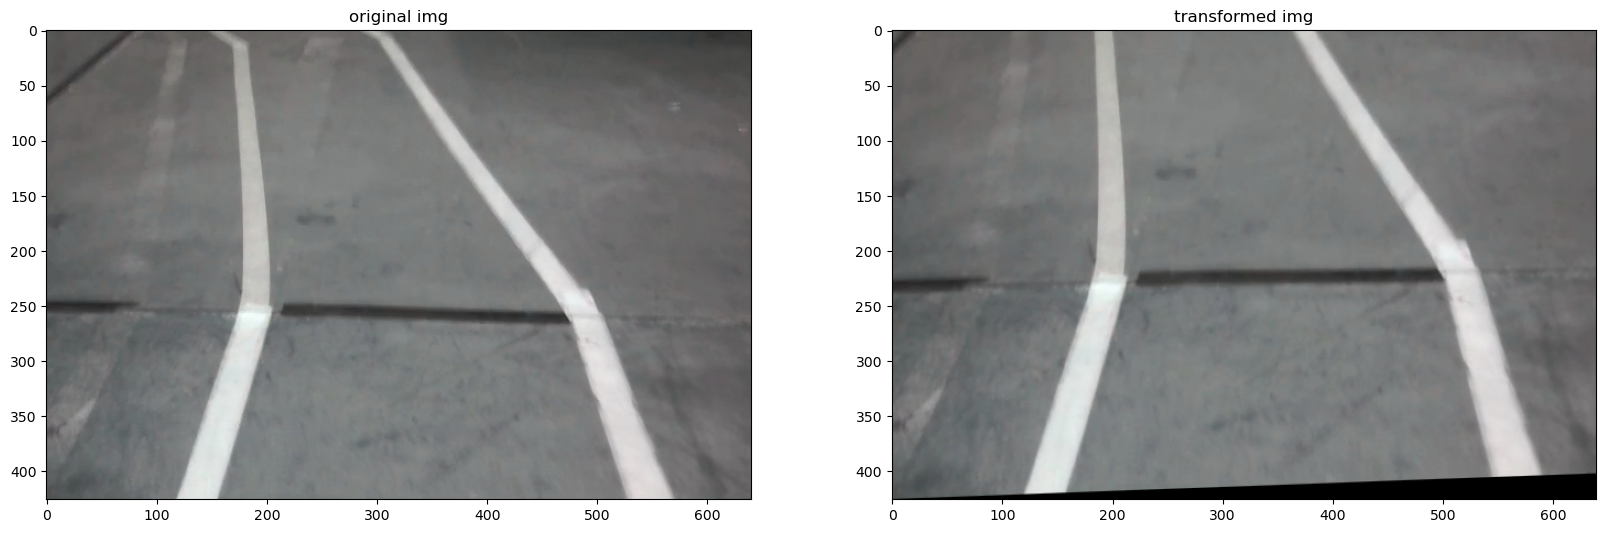

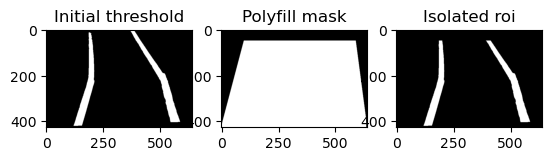

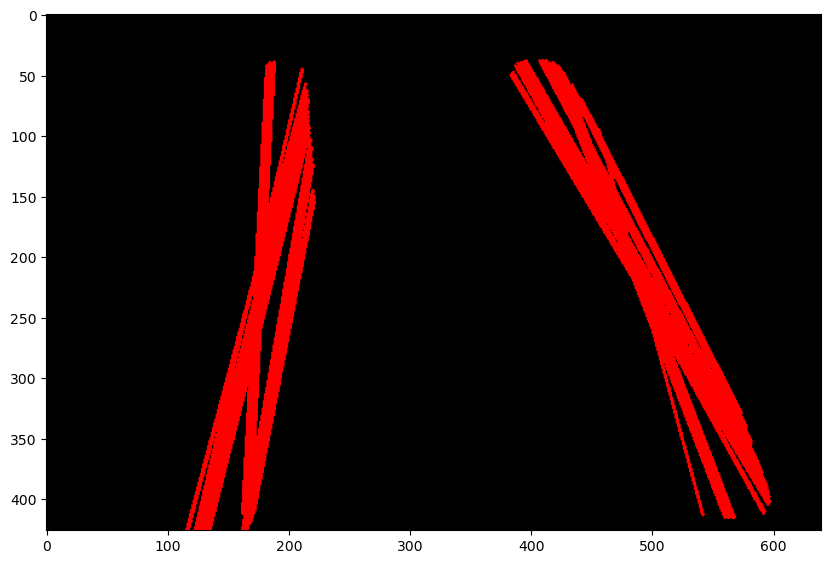

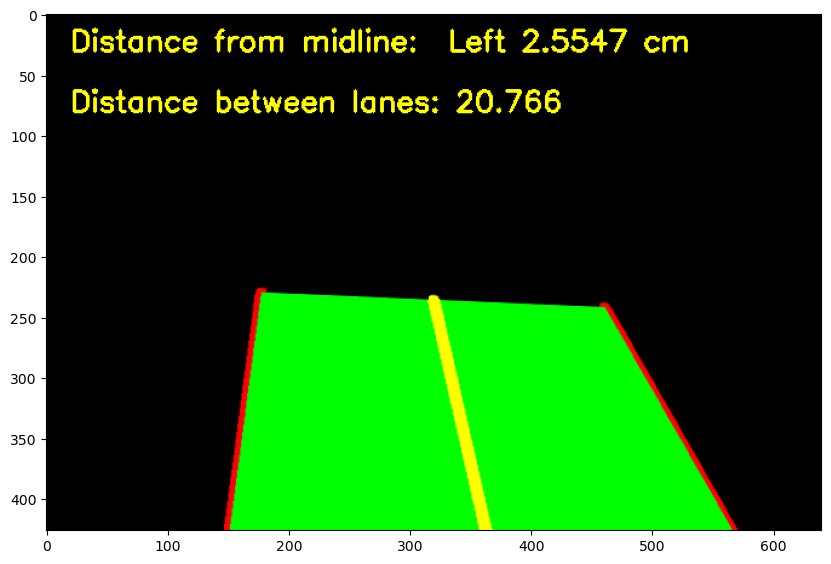

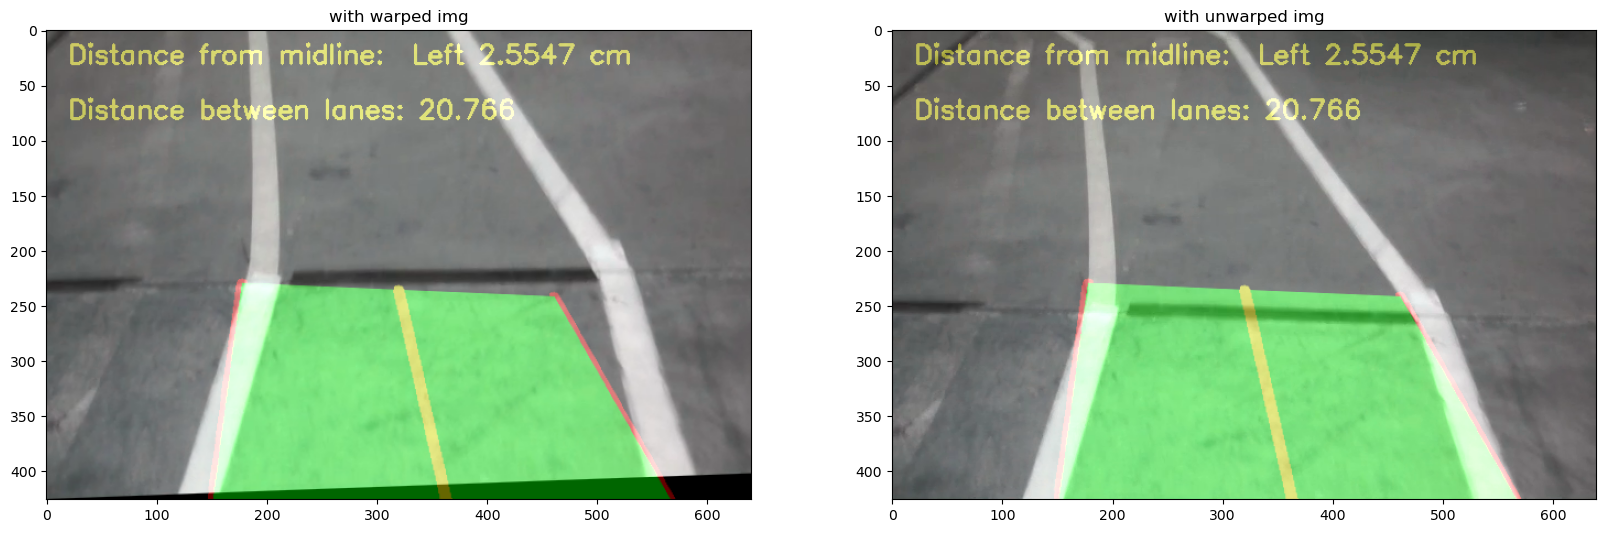

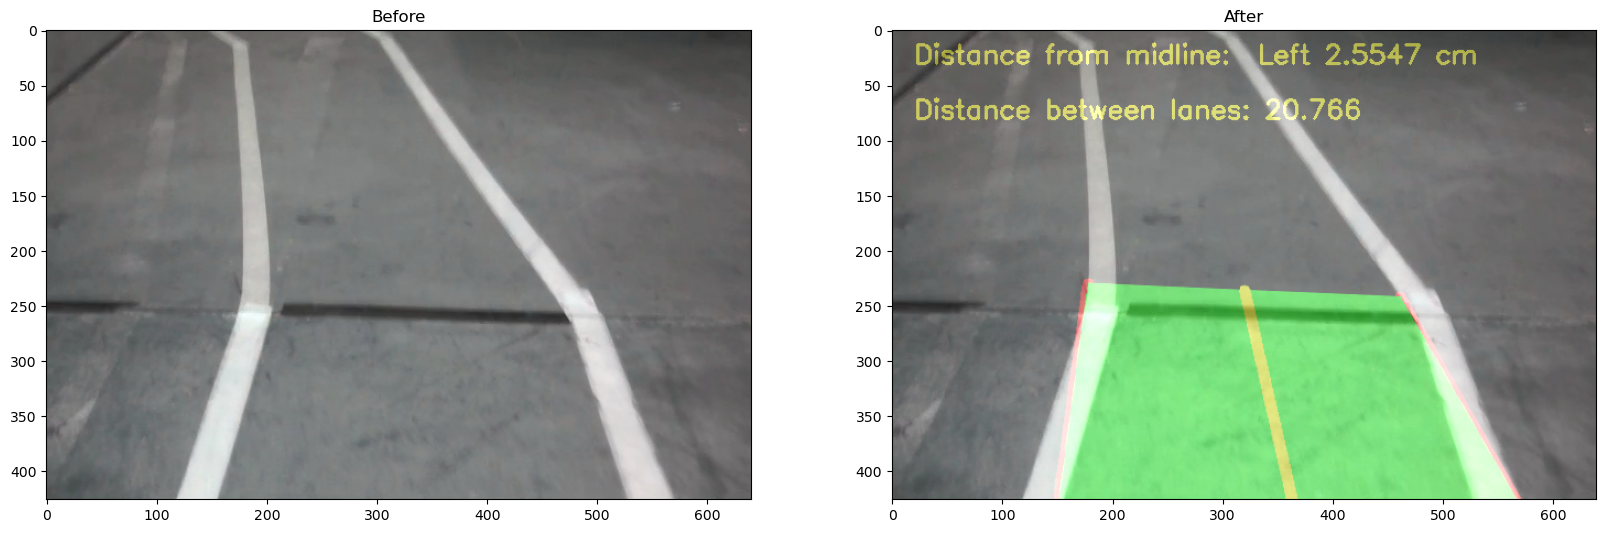

In [ ]:
img_in = "lane16-fr015"
img = cv2.imread(r'{}.png'.format(img_in))
result = process_image(img, test_image=True)
# cv2.imwrite('./distance-test-lane5-frame0-out.jpg', result);
# Display results.
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(1, 2, 1); plt.imshow(img); ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2); plt.imshow(result); ax.set_title('After');
# plt.savefig("{}-out.png".format(img_in))

In [ ]:
# NOTE: failed efforts to treat parallel lines

In [ ]:
# morphed = morph_image(img,test_image=True)

# OFFLINE VIDEO TEST

In [ ]:
# OFFLINE: VIDEO TEST

# Initialize our video capture.
video_in = "lane18"
video_cap = cv2.VideoCapture(r'./lanes/{}.mp4'.format(video_in))
video_cap.set(cv2.CAP_PROP_FPS, 15) 
if not video_cap.isOpened(): 
  print("Error opening video stream or file")

In [ ]:
from datetime import datetime
import time 

In [ ]:

# Retrieve video frame properties.
frame_w   = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h   = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_fps = int(video_cap.get(cv2.CAP_PROP_FPS))

# Select fourcc encoding for the mp4 file.
# Having issues? You could also try: *'mp4v' or *'avc1'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Specify the video output filenames.
video_out = '{}-output_{}.mp4'.format(video_in, datetime.now().strftime("%H-%M-%S"))

# Create the video writer objects.

frame_rate = 15
prev = 0

vid_out = cv2.VideoWriter(video_out, fourcc, 15, (frame_w,frame_h))

print("Begin processing video... Wait until 'finished' message!")

while True:

    time_elapsed = time.time() - prev
    res, frame = video_cap.read()

    if time_elapsed > 1./frame_rate:
        prev = time.time()
    
    if (frame is None):
        print("Finished processing video, see file: {}".format(video_out))
        break
    
    result = process_image(frame)

    vid_out.write(result)
vid_out.release()

# Close the video writer stream.


Begin processing video... Wait until 'finished' message!
Finished processing video, see file: lane18-output_18-38-26.mp4


In [ ]:
#check framerate of output video

cap = cv2.VideoCapture('lane17-output_18-16-41.mp4')
print(cap.get(cv2.CAP_PROP_FPS))


15.0
